#  機器學習_ML_validation_curve_驗證曲線
[API連結](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve)
[官方文件](http://scikit-learn.org/stable/modules/learning_curve.html#validation-curve)
學習曲線與驗證曲線是在機器學習中很重要的兩條線，透過線的呈現可以明白模型究竟是高偏差(high bias)還是高方差(high variance)。  
為什麼重要?  
因為high bias and high variance在實務上的調校是不相同的!  
你去對一個high bias的模型餵再多的資料，效果恐怕是有限的。  
你去對一個high variance給了更多的特徵，那不是提汽油上場嗎?  
* high bias 代表 underfitting
* high variance 代表 overfitting

學習來自吳恩達老師\_機器學習\_第六週課程
* 更多的數據
    * high variance有效
    * high bias沒效
* 嚐試用更少的特徵
    * high variance有效
* 取得更有效的特徵
    * high bias有效
* 用更高的多項式方式
    * high bias有效
    * high variance是浪費時間
* 減少正規項$\lambda$數值
    * high bias有效
* 增加正規項$\lambda$數值
    * high variance有效
    
學習曲線是以<font color=red>『訓練正確率』與『驗證正確率』</font>來製圖，而驗證曲線是以<font color=red>改變參數來製圖</font>。  
像是改變正規化參數$\lambda$(在sklearn為反正規化參數C)  
這方式類似於利用網格搜尋(GridSearc)來暴力求解，不過如同官方文件所說  
```
However, 
it is sometimes helpful to plot the influence of a single hyperparameter 
on the training score 
and the validation score to find out whether the estimator 
is overfitting or underfitting for some hyperparameter values.
```
有時候利用單一超參數去做繪製影響是有幫助的，這可以找出分類器對某些超參數過適與否。這部份在讀吳恩達老師的deep learning也有提到。    

## IMPORT
```python=
from sklearn.model_selection import validation_curve
```

## CLASS
```python=
sklearn.model_selection.validation_curve(
                    estimator, X, y, param_name, param_range, 
                    groups=None, cv=None, scoring=None, n_jobs=1,
                    pre_dispatch=’all’, verbose=0)
```

## 參數說明
### estimator
使用的分類器，但限制為需要有fit、predict兩個method!
### X
訓練資料集
### y
對應訓練資料集的label
### param_name
參數  
格式記得是"分類器__參數"  
### param_range
要被驗證的參數值  
以list格式提供  
[0.1, 0.001, 0.0001, 1.0, 10.0, 100.0]  
### groups

### cv
default 3  
定義拆分折數  
### scoring
模型評估  
可參考[官方關於模型評估的類型](http://scikit-learn.org/stable/modules/model_evaluation.html)  
### n_jobs 
default 1  
使用多少CPU核心數   
-1代表火力全開  
### pre_dispatch 

### verbose
default 0  
過程是否輸出  
0不輸出  
1偶爾輸出  
2一定輸出  

## 屬性
### train_scores 
訓練資料集分數
### test_scores 
測試資料集分數

## 範例
官方範例，我加上了註解說明。

In [1]:
print(__doc__)
#  載入套件
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

Automatically created module for IPython interactive environment


In [2]:
#  讀入資料集
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
#  設置參數區間
#  np.logspace用來建立等比數列，以10為基數
#  np.linspace用來建置等差數列
param_range = np.logspace(-6, -1, 5)
#  取得驗證曲線的訓練集得分與測試集得分
train_scores, test_scores = validation_curve(
                 #  此例測試SVM的gamma值
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
#  計算訓練集的平均
train_scores_mean = np.mean(train_scores, axis=1)
#  計算訓練集的標準差
train_scores_std = np.std(train_scores, axis=1)
#  計算測試集的平均
test_scores_mean = np.mean(test_scores, axis=1)
#  計算測試集的標準差
test_scores_std = np.std(test_scores, axis=1)

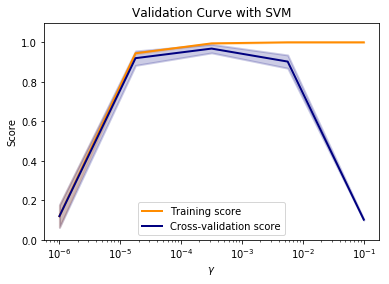

In [4]:
#  繪圖
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
#  繪製訓練集曲線
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
#  繪製訓練集區域
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#  繪製驗證集曲線
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
#  繪製驗證集區域
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
#  顯示標籤，以最佳位置設置
plt.legend(loc="best")
plt.show()